## Decsion trees

In [255]:
import numpy as np
import pandas as pd
import data_preprocess as dp

In [256]:
data = pd.read_csv('./data/D2.csv')

In [257]:
data.medical_specialty.value_counts(normalize=True)

medical_specialty
Invalid                              0.61700
Emergency/Trauma                     0.10885
InternalMedicine                     0.07570
Family/GeneralPractice               0.03765
Cardiology                           0.03285
Surgery-General                      0.02665
Radiologist                          0.02040
Orthopedics                          0.01355
Nephrology                           0.00900
Surgery-Vascular                     0.00665
Gastroenterology                     0.00645
Orthopedics-Reconstructive           0.00580
Psychiatry                           0.00440
Pulmonology                          0.00415
Urology                              0.00410
ObstetricsandGynecology              0.00365
Oncology                             0.00245
Neurology                            0.00225
Surgery-Cardiovascular/Thoracic      0.00200
Podiatry                             0.00180
Surgery-Cardiovascular               0.00155
Surgery-Neuro                        

### Steps to preprocess the data

- Revisit the data pre-processing steps from assignment 1
- Drop the columns with missing values - A1Cresult and max_glu_serum
- Reduce the number of unique values in the medical_specialty column, the admission_type_id column, the discharge_disposition_id column, and the admission_source_id column
- Convert the categorical columns into numerical columns using encoding
- Split the data into training and testing sets


In [258]:
df = dp.data_prep(data)

In [259]:
df

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,AfricanAmerican,1,8,1,Other,33,0,14,0,1,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency
1,Caucasian,1,7,3,Other,48,2,7,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Transfer
2,Caucasian,1,5,3,Surgical,25,1,15,0,0,...,0,0,0,1,0,1,0,Elective,Home,Referral
3,AfricanAmerican,1,5,6,Other,41,0,19,0,0,...,0,0,0,1,0,1,1,Emergency,Home,Emergency
4,AfricanAmerican,0,8,4,Other,22,0,12,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,AfricanAmerican,0,7,4,Internal Medicine,51,0,12,3,0,...,0,1,0,1,1,1,1,Emergency,Home,Referral
19996,Caucasian,0,5,9,Other,57,2,28,3,5,...,0,0,0,0,0,0,1,Emergency,AdditonalCare,Emergency
19997,Caucasian,0,8,3,Other,41,0,18,0,0,...,0,0,0,1,1,1,1,Emergency,AdditonalCare,Emergency
19998,Hispanic,0,5,3,Internal Medicine,49,0,15,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency


In [260]:
df.medical_specialty.value_counts(normalize=True)

medical_specialty
Other                0.64960
Internal Medicine    0.14355
Emergency            0.10885
Surgical             0.06015
General Practice     0.03785
Name: proportion, dtype: float64

In [261]:
len(df)

20000

In [262]:
# drop the rows with where discharge_disposition is deceased
df = df[df.discharge_disposition != 'Deceased']

In [263]:
len(df)

19680

In [264]:
# use one-hot encoding for race, medical_specialty, admission_type, discharge_disposition, admission_source
df = pd.get_dummies(df, columns=['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source'], dtype=int)


In [265]:
df.readmitted.value_counts(normalize=True)

readmitted
0    0.52627
1    0.47373
Name: proportion, dtype: float64

In [266]:
df.readmitted.value_counts(normalize=True)

readmitted
0    0.52627
1    0.47373
Name: proportion, dtype: float64

In [267]:
y = df['readmitted']

In [268]:
X = df.drop('readmitted', axis=1)

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
rs = 1

In [271]:
X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.2, random_state=rs)


In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [273]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [274]:
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [275]:
print(f'Training accuracy: {accuracy_score(y_train, model.predict(X_train)):.3f}')

Training accuracy: 1.000


In [276]:
print(f'Test accuracy: {accuracy_score(y_test, model.predict(X_test)):.3f}')

Test accuracy: 0.565


In [277]:
num_nodes = model.tree_.node_count
num_leaves = model.tree_.n_leaves

print(f'Total number of nodes: {num_nodes}')
print(f'Total number of leaves (rules): {num_leaves}')

Total number of nodes: 9017
Total number of leaves (rules): 4509


In [278]:
features = X.columns
# Get the feature index for the first split
first_split_feature_index = model.tree_.feature[0]

# Get the feature name by using the index
first_split_feature_name = features[first_split_feature_index]  

print(f'The first split is made on the feature: {first_split_feature_name}')

The first split is made on the feature: number_inpatient


In [279]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59      2051
           1       0.55      0.54      0.54      1885

    accuracy                           0.56      3936
   macro avg       0.56      0.56      0.56      3936
weighted avg       0.56      0.56      0.56      3936



In [280]:
importances = model.feature_importances_

In [281]:
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

indices = indices[:10]

for i in indices:
    print(f'{features[i]} --> {importances[i]:.3f}')

num_lab_procedures --> 0.174
num_medications --> 0.136
time_in_hospital --> 0.095
number_inpatient --> 0.074
age --> 0.059
num_procedures --> 0.051
number_diagnoses --> 0.049
insulin --> 0.041
number_outpatient --> 0.032
gender --> 0.022


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': [1,5,10,15,20]}

In [30]:
grid_search = GridSearchCV(model, param_grid=params, cv=10, n_jobs=-1, verbose=1, return_train_score=True)

In [31]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             return_train_score=True, verbose=1)

In [32]:
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}


In [33]:
import pandas as pd

In [34]:
# Convert cv_results_ to a pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)


In [35]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021541,0.004149,0.002660,0.001359,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.631746,0.618413,...,0.623544,0.623191,0.621383,0.621171,0.623147,0.622159,0.624206,0.624418,0.622840,0.001080
1,0.029482,0.007994,0.002407,0.000631,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.631746,0.618413,...,0.623544,0.623191,0.621383,0.621171,0.623147,0.622159,0.624206,0.624418,0.622840,0.001080
2,0.027169,0.003146,0.002043,0.000279,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.631746,0.618413,...,0.623544,0.623191,0.621383,0.621171,0.623147,0.622159,0.624206,0.624418,0.622840,0.001080
3,0.032614,0.005244,0.002329,0.000550,gini,1,15,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.631746,0.618413,...,0.623544,0.623191,0.621383,0.621171,0.623147,0.622159,0.624206,0.624418,0.622840,0.001080
4,0.028714,0.001607,0.002207,0.000398,gini,1,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.631746,0.618413,...,0.623544,0.623191,0.621383,0.621171,0.623147,0.622159,0.624206,0.624418,0.622840,0.001080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.126759,0.012946,0.001853,0.000634,entropy,15,1,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.601905,0.586667,...,0.764980,0.768085,0.770078,0.783275,0.786803,0.784192,0.781934,0.755399,0.774185,0.009521
146,0.109825,0.008191,0.001802,0.000399,entropy,15,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.605714,0.591111,...,0.736467,0.737384,0.743331,0.753423,0.754340,0.750247,0.750176,0.723359,0.743387,0.009036
147,0.104591,0.007487,0.001729,0.000640,entropy,15,10,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.595556,0.587937,...,0.722493,0.716705,0.721736,0.723359,0.722018,0.727805,0.720254,0.703387,0.720289,0.007880
148,0.108206,0.008536,0.001903,0.000374,entropy,15,15,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.601270,0.563810,...,0.704849,0.702096,0.703246,0.710586,0.702823,0.709457,0.703246,0.693296,0.703704,0.005309


In [36]:
import matplotlib.pyplot as plt


train_result = results.split0_train_score
test_result = results.split0_test_score
print("Total number of models: ", len(test_result))

Total number of models:  150


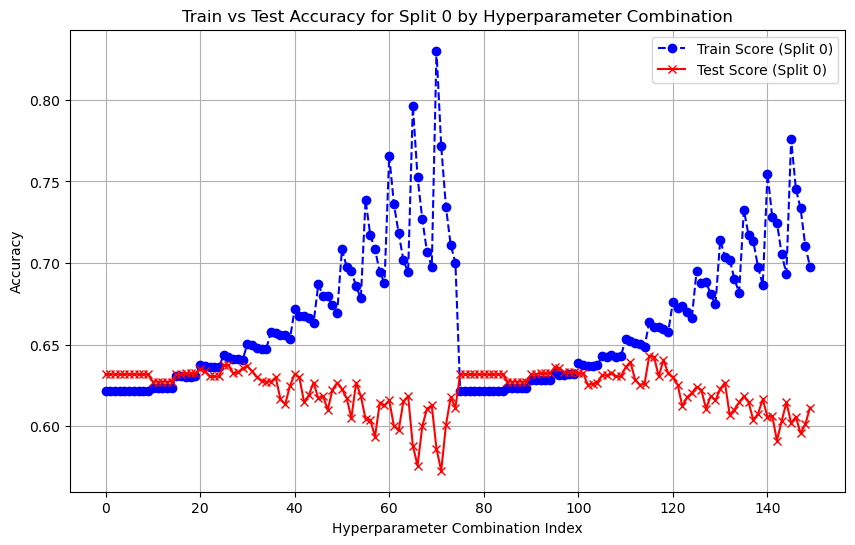

In [37]:
param_max_depth = results['param_max_depth']

# Use the index of hyperparameter combinations for plotting
param_index = range(len(train_result))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_index, train_result, label='Train Score (Split 0)', marker='o', linestyle='--', color='b')
plt.plot(param_index, test_result, label='Test Score (Split 0)', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Split 0 by Hyperparameter Combination')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

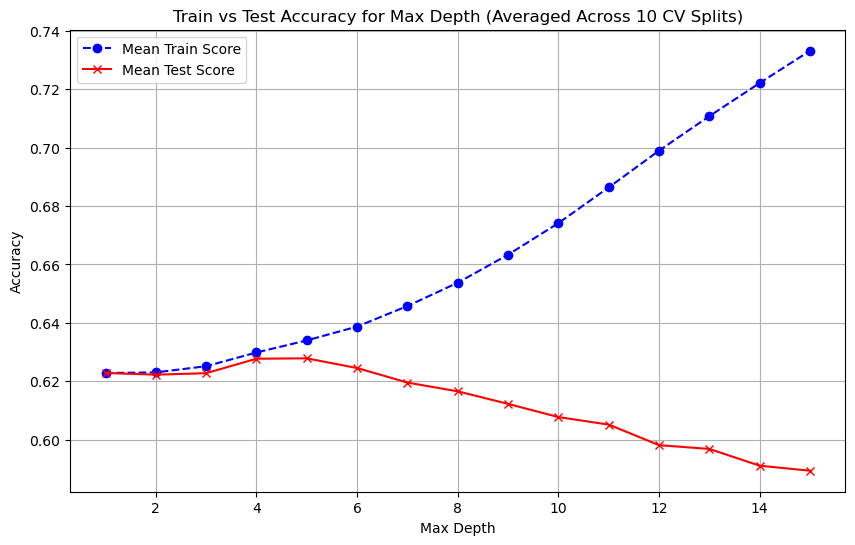

In [39]:
# Group results by max_depth to calculate mean test and train scores
mean_train_scores = results.groupby('param_max_depth')['mean_train_score'].mean()
mean_test_scores = results.groupby('param_max_depth')['mean_test_score'].mean()

# Plot the results for max_depth
plt.figure(figsize=(10, 6))
plt.plot(mean_train_scores.index, mean_train_scores, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(mean_test_scores.index, mean_test_scores, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Max Depth (Averaged Across 10 CV Splits)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

In [41]:
best_params = grid_search.best_params_

In [42]:
best_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=rs  # Keep the random_state for reproducibility
)

In [43]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

In [245]:
print(f'Training accuracy: {accuracy_score(y_train, best_model.predict(X_train)): .3f}')

Training accuracy:  0.632


In [246]:
print(f'Test accuracy: {accuracy_score(y_test, best_model.predict(X_test)): .3f}')

Test accuracy:  0.618


In [248]:
num_nodes = best_model.tree_.node_count
num_leaves = best_model.tree_.n_leaves

print(f'Total number of nodes: {num_nodes}')
print(f'Total number of leaves (rules): {num_leaves}')

Total number of nodes: 31
Total number of leaves (rules): 16


In [45]:
# classification report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67      2051
           1       0.63      0.49      0.55      1885

    accuracy                           0.62      3936
   macro avg       0.62      0.61      0.61      3936
weighted avg       0.62      0.62      0.61      3936



In [254]:
features = X.columns
# Get the feature index for the first split
first_split_feature_index = best_model.tree_.feature[0]

# Get the feature name by using the index
first_split_feature_name = features[first_split_feature_index]  

print(f'The first split is made on the feature: {first_split_feature_name}')

The first split is made on the feature: number_inpatient


In [249]:
importances = best_model.feature_importances_

In [253]:
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

indices = indices[:10]

for i in indices:
    print(f'{features[i]} --> {importances[i]:.3f}')

number_inpatient --> 0.791
num_medications --> 0.047
number_emergency --> 0.046
age --> 0.042
number_outpatient --> 0.020
medical_specialty_Other --> 0.019
discharge_disposition_AdditonalCare --> 0.010
medical_specialty_Internal Medicine --> 0.010
number_diagnoses --> 0.007
race_Other --> 0.007


In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

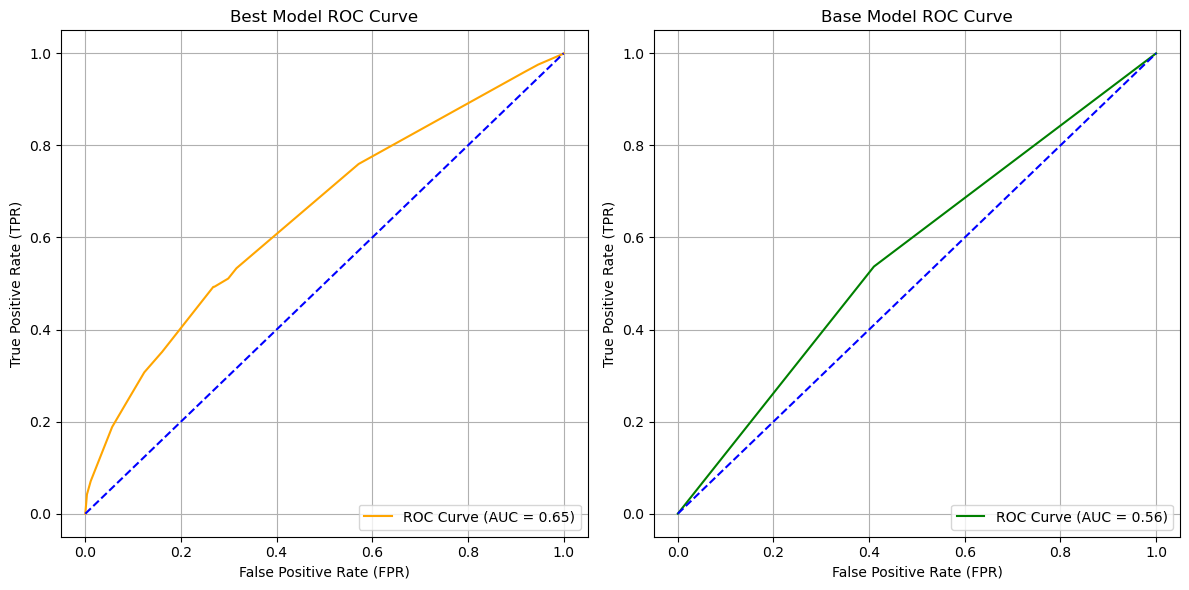

In [47]:
# Predicted probabilities for both models (for class 1)
y_proba_best = best_model.predict_proba(X_test)[:, 1]
y_proba_model = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both models
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

fpr_model, tpr_model, _ = roc_curve(y_test, y_proba_model)
roc_auc_model = roc_auc_score(y_test, y_proba_model)

# Create subplots for the two models
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC for best_model
ax[0].plot(fpr_best, tpr_best, color='orange', label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
ax[0].plot([0, 1], [0, 1], color='blue', linestyle='--')
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('Best Model ROC Curve')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Plot ROC for model
ax[1].plot(fpr_model, tpr_model, color='green', label=f'ROC Curve (AUC = {roc_auc_model:.2f})')
ax[1].plot([0, 1], [0, 1], color='blue', linestyle='--')
ax[1].set_xlabel('False Positive Rate (FPR)')
ax[1].set_ylabel('True Positive Rate (TPR)')
ax[1].set_title('Base Model ROC Curve')
ax[1].legend(loc='lower right')
ax[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()